<a href="https://colab.research.google.com/github/MorFinGauNTT/OnlineRetail/blob/main/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.4/spark-3.5.4-bin-hadoop3.tgz
!tar xf spark-3.5.4-bin-hadoop3.tgz
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.4-bin-hadoop3"


In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Create spark session
spark = SparkSession.builder.appName("ColabPySparkExample").getOrCreate()

print("Pyspark başlatıldı!")


PySpark başlatıldı!


In [ ]:

spark.sparkContext.setLogLevel("ERROR")
data = spark.read.csv("OnlineRetail.csv", header=True, inferSchema=True)


data.show(5)

data.printSchema()
print(f"Total records: {data.count()}")
data.select("InvoiceNo", "StockCode", "Quantity", "UnitPrice").show(5)

clean_data = data.dropna()
clean_data = clean_data.filter((clean_data.Quantity > 0) & (clean_data.UnitPrice > 0))

clean_data = clean_data.withColumn("TotalSales", col("Quantity") * col("UnitPrice"))
clean_data.show(5)

#Best Selling Products
top_products = clean_data.groupBy("StockCode").sum("TotalSales").orderBy(col("sum(TotalSales)").desc())
top_products.show(10)

#Total Sales by Country
sales_by_country = clean_data.groupBy("Country").sum("TotalSales").orderBy(col("sum(TotalSales)").desc())
sales_by_country.show(10)

# write top 10 product
top_products.write.csv("output/topproducts1", mode="append", header=True)


# write sales results of top 10 countries
sales_by_country.write.csv("output/sales_by_country1.csv",mode="append",  header=True)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
only showing top 5 rows

root
 |-- InvoiceNo: string (nullable = true)
 |

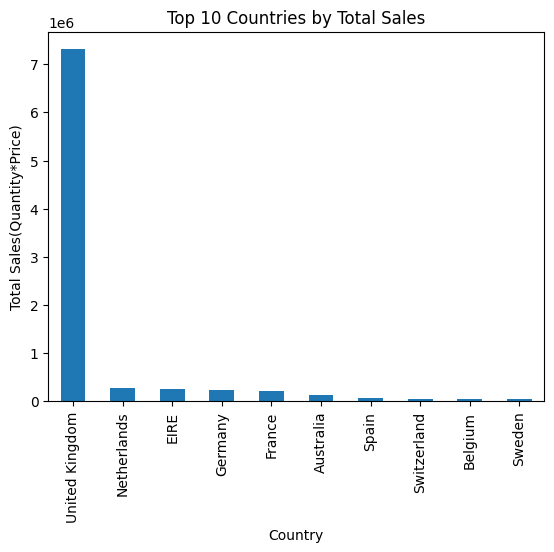

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load datas of countries
df = pd.read_csv("output/sales_by_country1.csv/countries.csv")

# draw top 10 countries graph
df.head(10).plot(kind="bar", x="Country", y="sum(TotalSales)", legend=False)
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales(Quantity*Price)")
plt.show()


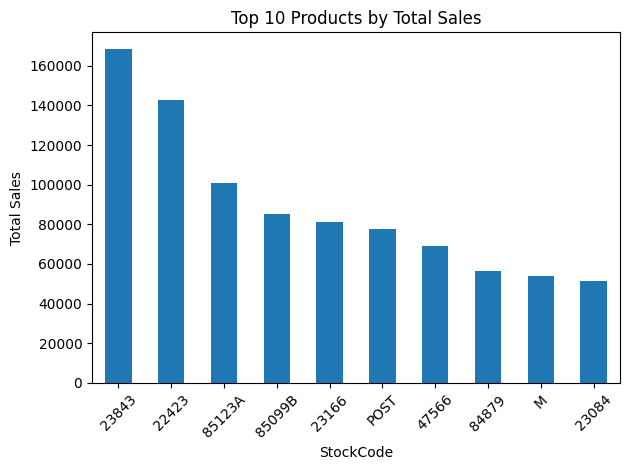

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_csv("output/topproducts1/topproducts.csv")

#v Draw top 10 products sale graph
df.head(10).plot(kind="bar", x="StockCode", y="sum(TotalSales)", legend=False)
plt.title("Top 10 Products by Total Sales")
plt.xlabel("StockCode")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)  # X ekseni etiketlerini döndür
plt.tight_layout()  # Daha iyi düzen
plt.show()

